# CIFAR-10 을 이용한 CNN 구축

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15370284169853826867
 xla_global_id: -1]

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### Data Load

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


### Data 시각화

In [6]:
cifa10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

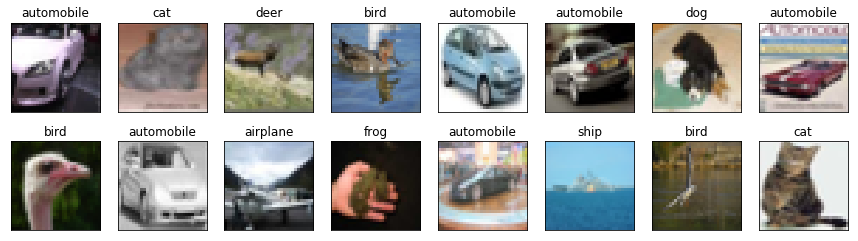

In [7]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_train))
    axes[i].imshow(X_train[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(cifa10_classes[y_train[idx, 0]])

### data normalization

In [7]:
X_train_scaled = X_train / 255.
X_test_scaled  = X_test / 255.

### one-hot encoding of class labels

In [8]:
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot  = utils.to_categorical(y_test)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


### Data Loader 생성

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(64)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(64)

### model build

In [13]:
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 activation_7 (Activation)   (None, 16, 16, 32)        0         
                                                      

In [16]:
# model compile
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [17]:
model.fit(train_ds, epochs=5, validation_data=test_ds, verbose=1, shuffle=True)

Epoch 1/5
782/782 [==============================] - 19s 24ms/step - loss: 1.5865 - accuracy: 0.4206 - val_loss: 1.3670 - val_accuracy: 0.5138
Epoch 2/5
782/782 [==============================] - 19s 24ms/step - loss: 1.3810 - accuracy: 0.5047 - val_loss: 1.2014 - val_accuracy: 0.5802
Epoch 3/5
782/782 [==============================] - 19s 24ms/step - loss: 1.2613 - accuracy: 0.5470 - val_loss: 1.1158 - val_accuracy: 0.6142
Epoch 4/5
782/782 [==============================] - 19s 24ms/step - loss: 1.1816 - accuracy: 0.5795 - val_loss: 1.0210 - val_accuracy: 0.6400
Epoch 5/5
782/782 [==============================] - 19s 25ms/step - loss: 1.1177 - accuracy: 0.6021 - val_loss: 0.9948 - val_accuracy: 0.6566


In [18]:
model.evaluate(test_ds, verbose=0)

[0.9947988986968994, 0.6565999984741211]

In [20]:
y_pred = model.predict(X_test_scaled).argmax(axis=1)
print(y_pred.shape)
print(y_pred)

313/313 [==============================] - 2s 5ms/step
(10000,)
[3 8 8 ... 5 7 7]


In [21]:
y_true = y_test.ravel()
y_true

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

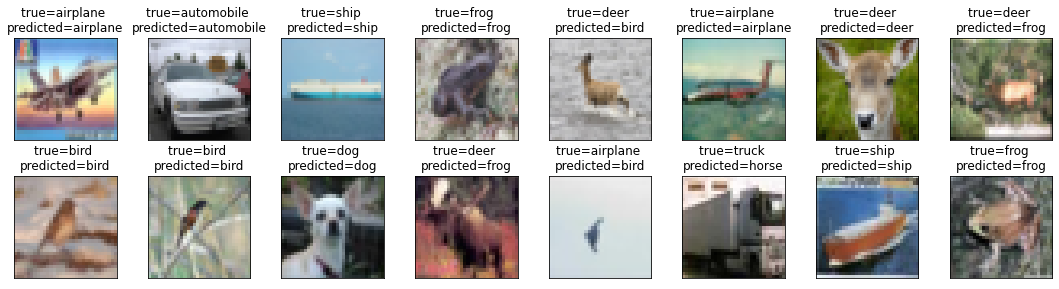

In [22]:
fig, axes = plt.subplots(2, 8, figsize=(15, 4))
axes = axes.ravel()
for i in range(16):
    idx = np.random.randint(0, len(y_test))
    axes[i].imshow(X_test[idx, :])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("true={} \npredicted={}".
                      format(cifa10_classes[y_true[idx]], cifa10_classes[y_pred[idx]]))
plt.tight_layout()

## accuracy 시각화

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
cm

array([[697,  23, 125,  14,   7,  14,  25,  17,  58,  20],
       [ 16, 849,  12,   9,   7,   9,  27,   8,  15,  48],
       [ 62,   6, 569,  41,  89,  88, 104,  29,   9,   3],
       [ 16,   9, 125, 382,  55, 229, 149,  27,   5,   3],
       [ 25,   5, 124,  39, 546,  54, 127,  73,   6,   1],
       [ 10,   3,  95, 132,  37, 628,  50,  40,   2,   3],
       [  2,   2,  53,  38,  40,  16, 843,   4,   2,   0],
       [  6,   2,  52,  32,  68, 109,  25, 700,   1,   5],
       [100,  53,  35,  24,   5,  15,  18,  13, 722,  15],
       [ 44, 163,  20,  27,   4,  15,  45,  27,  25, 630]], dtype=int64)

### heatmap 작성

Test Accuracy : 0.6566


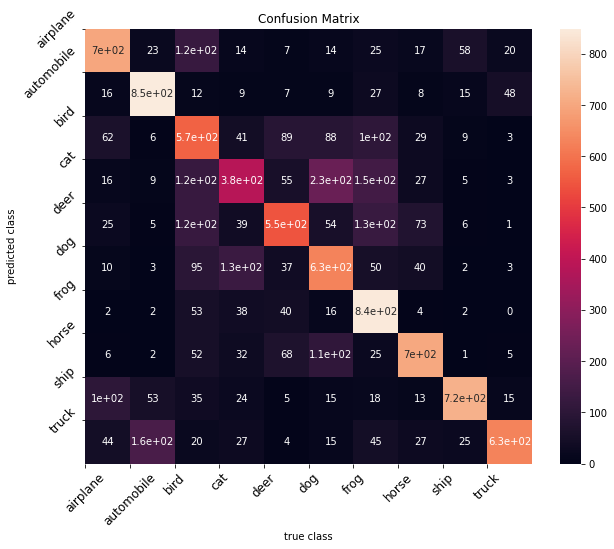

In [24]:
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True)

plt.xticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifa10_classes, rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_true, y_pred))

# 실습 :

## Convolutional Layer 와 Pooling Layer 를  추가하고 Hyper-parameter 조정하여 성능 개선 혹은 epochs 늘려서 accuracy 향상 비교